# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## 1. Preprocessing

### 1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).

In [2]:
response = requests.get('https://drive.google.com/u/0/uc?id=14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw&export=download')

with open('../data/checker_submits.csv', 'w', encoding='utf-8') as file:
    file.write(response.text)

In [3]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df.index.name = 'index'
df

,uid,labname,numTrials,timestamp
index,,,,
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761


### 2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.

In [4]:
df[['hour', 'dayofweek']] = df['timestamp'].apply(lambda x: [x.hour, x.dayofweek]).tolist()
df.drop(columns='timestamp', inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
index,,,,,
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3


### 3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.

In [5]:
categorial_cols = ['uid', 'labname']
oh_encoder = OneHotEncoder()

In [6]:
encoded_cols = pd.DataFrame(oh_encoder.fit_transform(df[categorial_cols]).toarray(), 
                            index=df.index,
                            columns=oh_encoder.get_feature_names_out())
df.drop(columns=categorial_cols, inplace=True)
df = pd.concat([df, encoded_cols], axis='columns')

In [7]:
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
index,,,,,,,,,,,,,,,,,,,,,
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4. Use `StandardScaler()` and scale your continuous features.

In [8]:
continuos_features = ['numTrials', 'hour']
std_scaller = StandardScaler()

In [9]:
df[continuos_features] = pd.DataFrame(std_scaller.fit_transform(df[continuos_features]), index=df.index)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
index,,,,,,,,,,,,,,,,,,,,,
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 5. Save the dataframe as `dayofweek.csv`.

In [10]:
df.to_csv('../data/dayofweek.csv')

### 6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [11]:
print("Accuracy of naive algo:", metrics.accuracy_score(
    df['dayofweek'],
    np.full(df['dayofweek'].shape, df['dayofweek'].value_counts().idxmax())
))

Accuracy of naive algo: 0.23487544483985764


## 2. Algorithms
### Prepare data

In [12]:
X = df.drop(columns=['dayofweek']).values
y = df['dayofweek'].values

feature_names = df.drop(columns=['dayofweek']).columns

In [13]:
X

array([[-0.78866744, -2.5623525 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.75676424, -2.5623525 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.72486105, -2.5623525 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.59724826,  0.94538241,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.56534507,  0.94538241,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.53344187,  0.94538241,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [14]:
y

array([4, 4, 4, ..., 3, 3, 3])

### A function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.

In [15]:
def draw_importrant_features(coefficients, feature_names, top_n):
    fig, ax = plt.subplots(figsize=(15, 10))

    named_coeffs = dict(zip(feature_names, coefficients))
    named_coeffs = dict(sorted(named_coeffs.items(), key=lambda item: item[1], reverse=True)[:top_n])

    sns.barplot(x=list(named_coeffs.values()), y=list(named_coeffs.keys()),
                label=f'Top-{top_n} important features', ax=ax, orient = 'h')

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [16]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [17]:
y_pred = logreg.predict(X)

print("Accuracy of logreg:", metrics.accuracy_score(y, y_pred))

Accuracy of logreg: 0.6405693950177936


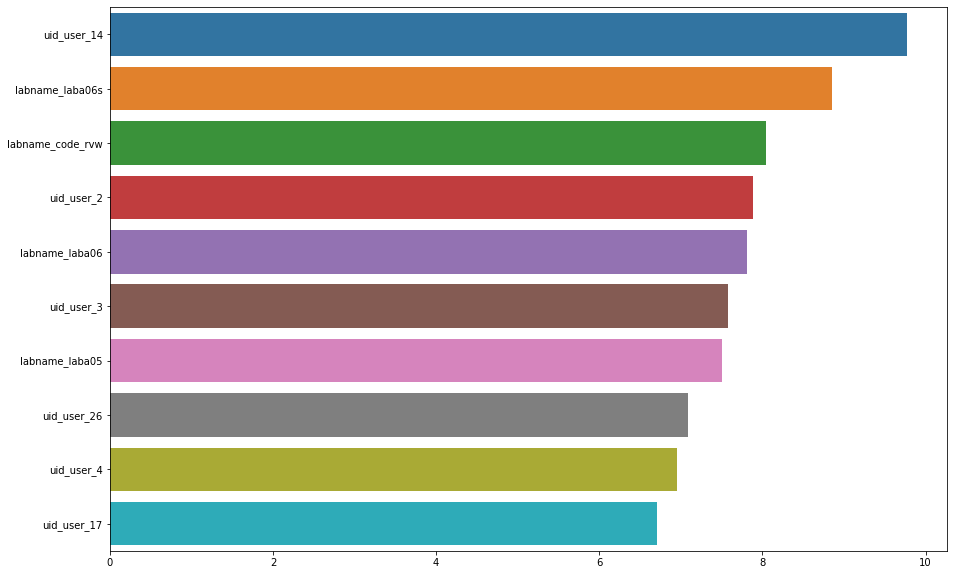

In [18]:
draw_importrant_features(sum(np.abs(logreg.coef_)), feature_names, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [19]:
svc = svm.SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X, y)

SVC(kernel='linear', probability=True, random_state=21)

In [20]:
y_pred = svc.predict(X)

print("Accuracy of SVC:", metrics.accuracy_score(y, y_pred))

Accuracy of SVC: 0.702846975088968


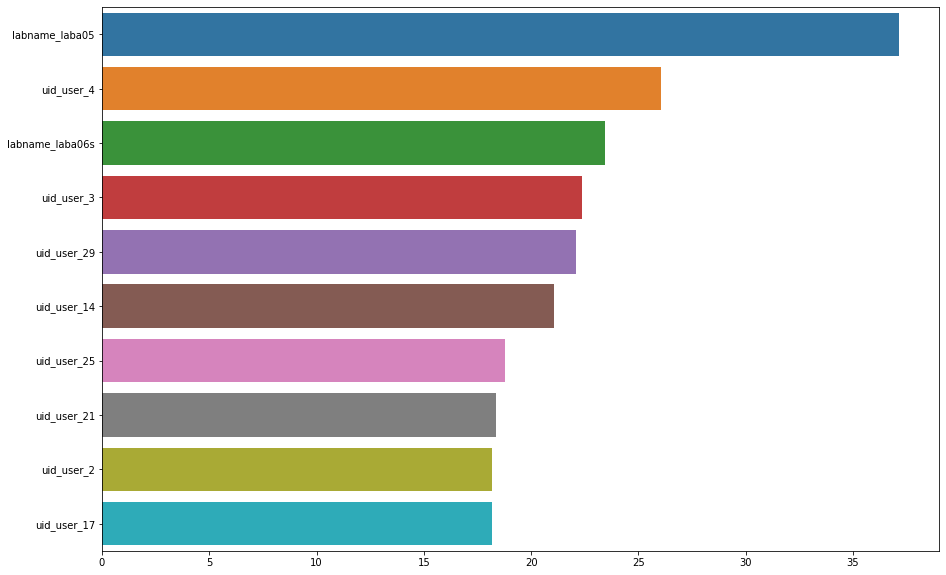

In [21]:
draw_importrant_features(sum(np.abs(svc.coef_)), feature_names, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [22]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [23]:
y_pred = tree.predict(X)

print("Accuracy of Decision tree:", metrics.accuracy_score(y, y_pred))

Accuracy of Decision tree: 0.5516014234875445


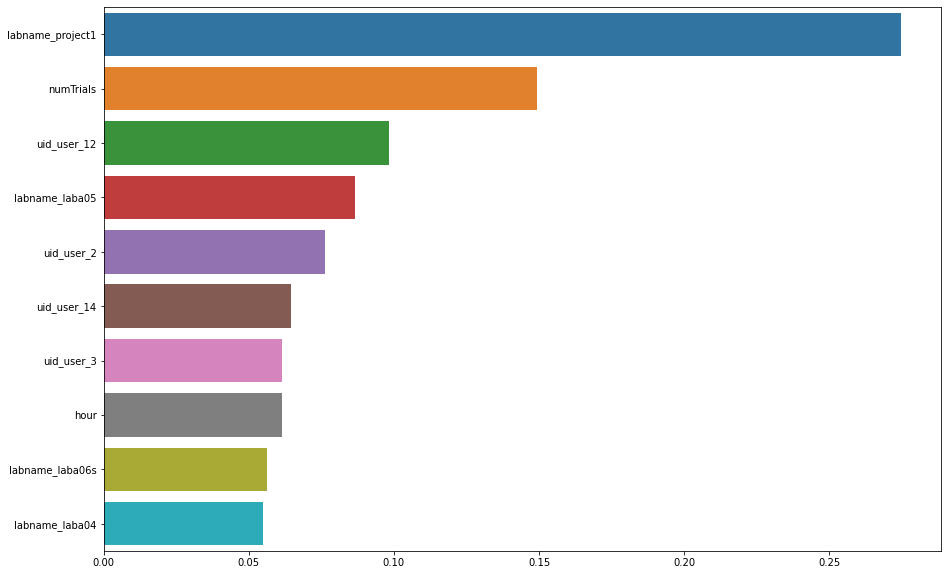

In [24]:
draw_importrant_features(np.abs(tree.feature_importances_), feature_names, 10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [25]:
forest = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
forest.fit(X, y)

RandomForestClassifier(max_depth=25, random_state=21)

In [26]:
y_pred = forest.predict(X)

print("Accuracy of Random Forest:", metrics.accuracy_score(y, y_pred))

Accuracy of Random Forest: 1.0


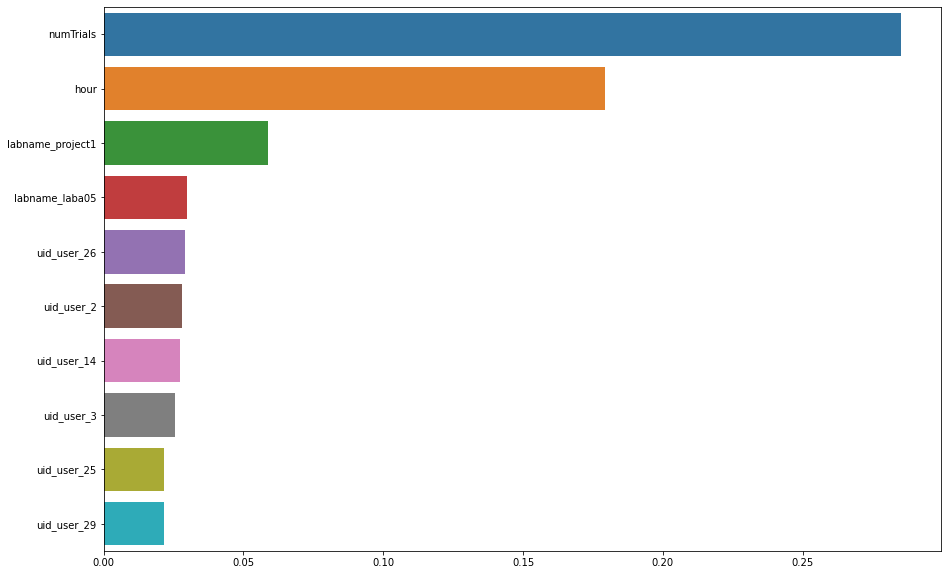

In [27]:
draw_importrant_features(np.abs(forest.feature_importances_), feature_names, 10)